# **PRÁCTICA 4. "QUANTUM TELEPORTATION**

**MIGUEL ÁNGEL NAVARRO ARENAS.**

In [ ]:
!pip install qiskit
!pip install git+https://github.com/qiskit-community/qiskit-textbook.git#subdirectory=qiskit-textbook-src
!pip install numexpr
!pip install pylatexenc

# Do the necessary imports
import numpy as np
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit import IBMQ, Aer, transpile, assemble, execute
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from qiskit.extensions import Initialize
from qiskit_textbook.tools import random_state, array_to_latex
from math import sqrt, pi
from qiskit.quantum_info import *
from qiskit.visualization import *
from qiskit.result import *
import math

# **1.- CREATING BELL PAIRS**

In [19]:
qc_Bellpair = QuantumCircuit(2)
#### your code goes here 

qc_Bellpair.h(0)
qc_Bellpair.cnot(0,1)


# Let's view our circuit
qc_Bellpair.draw()

┌───┐     
q_0: ┤ H ├──■──
     └───┘┌─┴─┐
q_1: ─────┤ X ├
          └───┘

In [20]:
backend = Aer.get_backend('statevector_simulator') # Tell Qiskit how to simulate our circuit
# Let's display the output state vector
result = execute(qc_Bellpair,backend).result() # Do the simulation, returning the result
out_state = result.get_statevector()
print(out_state) # Display the output state vector

Statevector([0.70710678+0.j, 0.        +0.j, 0.        +0.j,
             0.70710678+0.j],
            dims=(2, 2))


# **2.- TRANSFERING QUANTUM STATES: THE TELEPORTATION PROTOCOL**

In [49]:
def init_state(qc, a):
    
    #### your code goes here 
      
    desired_vector=[1,0]
    qc.initialize(desired_vector,a)
    qc.draw()
    qc.barrier()

In [11]:
def create_bell_pair(qc, a, b):
    """Creates a bell pair in qc using qubits a & b"""
    #### your code goes here
    qc.h(a)
    qc.cx(a,b)
    qc.draw()

In [6]:
def alice_gates(qc, psi, a):
    #### your code goes here
    qc.cx(psi,a)
    qc.h(a)

In [7]:
def measure_and_send(qc, a, b):
    """Measures qubits a & b and 'sends' the results to Bob"""
    qc.barrier()
    #### your code goes here
    qc.measure(a,0)
    qc.measure(b,1)

In [8]:
# This function takes a QuantumCircuit (qc), integer (qubit)
# and ClassicalRegisters (crz & crx) to decide which gates to apply
def bob_gates(qc, qubit, crz, crx):
    #### your code goes here
    qc.x(qubit).c_if(crx,1)
    qc.z(qubit).c_if(crz,1)

In [50]:
## SETUP
# Protocol uses 3 qubits and 2 classical bits in 2 different registers
qr = QuantumRegister(3, name="q")
crz, crx = ClassicalRegister(1, name="crz"), ClassicalRegister(1, name="crx")
teleportation_circuit = QuantumCircuit(qr, crz, crx)

## STEP 1
#### your code goes here 
init_state(teleportation_circuit,0)



## STEP 2
#### your code goes here 
create_bell_pair(teleportation_circuit,1,2)


## STEP 3 & 4
teleportation_circuit.barrier() # Use barrier to separate steps
#### your code goes here 
alice_gates(teleportation_circuit,0,1)
measure_and_send(teleportation_circuit,0,1)


## STEP 5
teleportation_circuit.barrier() # Use barrier to separate steps
#### your code goes here 
bob_gates(teleportation_circuit,2,crz,crx)


teleportation_circuit.draw()

┌─────────────────┐ ░            ░            ░ ┌─┐    ░               
  q_0: ┤ Initialize(1,0) ├─░────────────░───■────────░─┤M├────░───────────────
       └─────────────────┘ ░ ┌───┐      ░ ┌─┴─┐┌───┐ ░ └╥┘┌─┐ ░               
  q_1: ────────────────────░─┤ H ├──■───░─┤ X ├┤ H ├─░──╫─┤M├─░───────────────
                           ░ └───┘┌─┴─┐ ░ └───┘└───┘ ░  ║ └╥┘ ░  ┌───┐  ┌───┐ 
  q_2: ────────────────────░──────┤ X ├─░────────────░──╫──╫──░──┤ X ├──┤ Z ├─
                           ░      └───┘ ░            ░  ║  ║  ░  └─╥─┘  └─╥─┘ 
                                                        ║  ║       ║   ┌──╨──┐
crz: 1/═════════════════════════════════════════════════╩══╬═══════╬═══╡ 0x1 ╞
                                                        0  ║    ┌──╨──┐└─────┘
crx: 1/════════════════════════════════════════════════════╩════╡ 0x1 ╞═══════
                                                           0    └─────┘

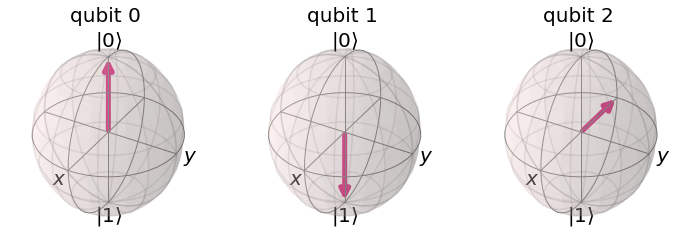

In [51]:
sv_sim = Aer.get_backend('statevector_simulator')
qobj = assemble(teleportation_circuit)
out_vector = sv_sim.run(qobj).result().get_statevector()
plot_bloch_multivector(out_vector)

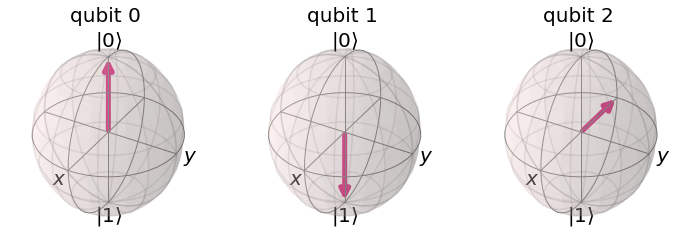

In [52]:
sv_sim = Aer.get_backend('statevector_simulator')
qobj = assemble(teleportation_circuit)
out_vector = sv_sim.run(qobj).result().get_statevector()
plot_bloch_multivector(out_vector)

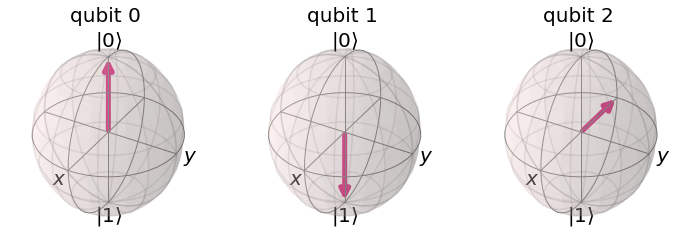

In [53]:
sv_sim = Aer.get_backend('statevector_simulator')
qobj = assemble(teleportation_circuit)
out_vector = sv_sim.run(qobj).result().get_statevector()
plot_bloch_multivector(out_vector)

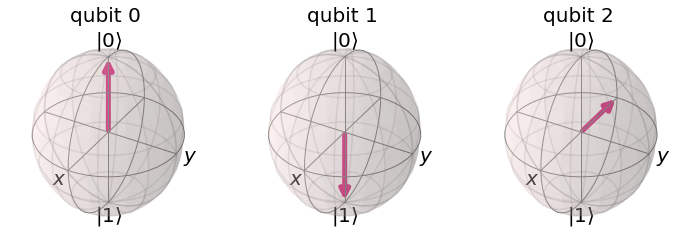

In [54]:
sv_sim = Aer.get_backend('statevector_simulator')
qobj = assemble(teleportation_circuit)
out_vector = sv_sim.run(qobj).result().get_statevector()
plot_bloch_multivector(out_vector)

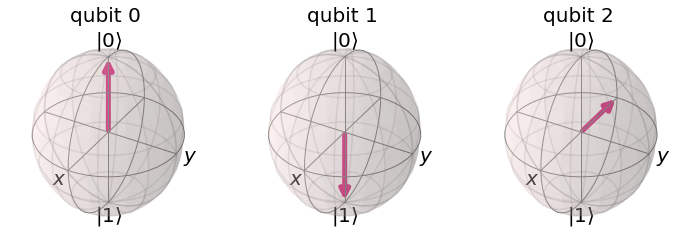

In [55]:
sv_sim = Aer.get_backend('statevector_simulator')
qobj = assemble(teleportation_circuit)
out_vector = sv_sim.run(qobj).result().get_statevector()
plot_bloch_multivector(out_vector)

In [56]:
def init_state(qc, a):
    
    #### your code goes here 
      
    desired_vector=[0,1]
    qc.initialize(desired_vector,a)
    qc.draw()
    qc.barrier()

In [57]:
## SETUP 2
# Protocol uses 3 qubits and 2 classical bits in 2 different registers
qr = QuantumRegister(3, name="q")
crz, crx = ClassicalRegister(1, name="crz"), ClassicalRegister(1, name="crx")
teleportation_circuit = QuantumCircuit(qr, crz, crx)

## STEP 1
#### your code goes here 
init_state(teleportation_circuit,0)



## STEP 2
#### your code goes here 
create_bell_pair(teleportation_circuit,1,2)


## STEP 3 & 4
teleportation_circuit.barrier() # Use barrier to separate steps
#### your code goes here 
alice_gates(teleportation_circuit,0,1)
measure_and_send(teleportation_circuit,0,1)


## STEP 5
teleportation_circuit.barrier() # Use barrier to separate steps
#### your code goes here 
bob_gates(teleportation_circuit,2,crz,crx)


teleportation_circuit.draw()

┌─────────────────┐ ░            ░            ░ ┌─┐    ░               
  q_0: ┤ Initialize(0,1) ├─░────────────░───■────────░─┤M├────░───────────────
       └─────────────────┘ ░ ┌───┐      ░ ┌─┴─┐┌───┐ ░ └╥┘┌─┐ ░               
  q_1: ────────────────────░─┤ H ├──■───░─┤ X ├┤ H ├─░──╫─┤M├─░───────────────
                           ░ └───┘┌─┴─┐ ░ └───┘└───┘ ░  ║ └╥┘ ░  ┌───┐  ┌───┐ 
  q_2: ────────────────────░──────┤ X ├─░────────────░──╫──╫──░──┤ X ├──┤ Z ├─
                           ░      └───┘ ░            ░  ║  ║  ░  └─╥─┘  └─╥─┘ 
                                                        ║  ║       ║   ┌──╨──┐
crz: 1/═════════════════════════════════════════════════╩══╬═══════╬═══╡ 0x1 ╞
                                                        0  ║    ┌──╨──┐└─────┘
crx: 1/════════════════════════════════════════════════════╩════╡ 0x1 ╞═══════
                                                           0    └─────┘

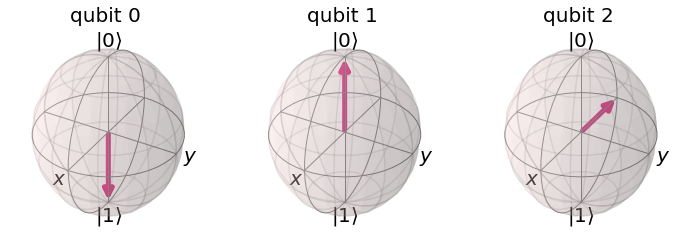

In [58]:
sv_sim = Aer.get_backend('statevector_simulator')
qobj = assemble(teleportation_circuit)
out_vector = sv_sim.run(qobj).result().get_statevector()
plot_bloch_multivector(out_vector)

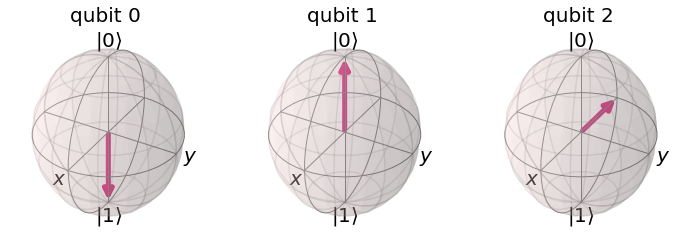

In [59]:
sv_sim = Aer.get_backend('statevector_simulator')
qobj = assemble(teleportation_circuit)
out_vector = sv_sim.run(qobj).result().get_statevector()
plot_bloch_multivector(out_vector)

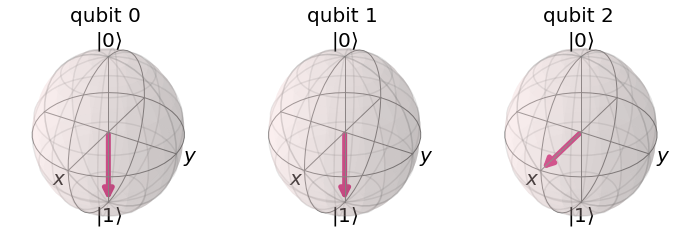

In [60]:
sv_sim = Aer.get_backend('statevector_simulator')
qobj = assemble(teleportation_circuit)
out_vector = sv_sim.run(qobj).result().get_statevector()
plot_bloch_multivector(out_vector)

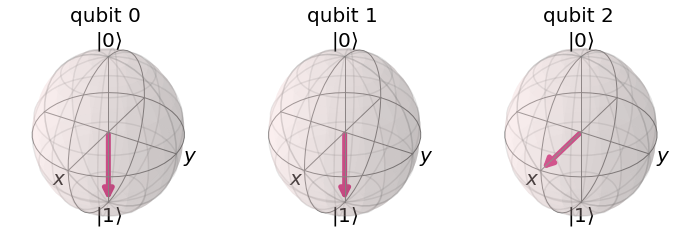

In [61]:
sv_sim = Aer.get_backend('statevector_simulator')
qobj = assemble(teleportation_circuit)
out_vector = sv_sim.run(qobj).result().get_statevector()
plot_bloch_multivector(out_vector)

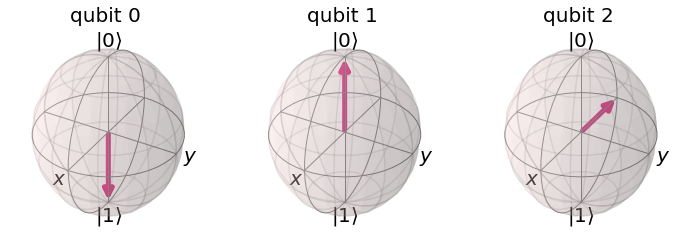

In [62]:
sv_sim = Aer.get_backend('statevector_simulator')
qobj = assemble(teleportation_circuit)
out_vector = sv_sim.run(qobj).result().get_statevector()
plot_bloch_multivector(out_vector)

In [63]:
def init_state(qc, a):
    
    #### your code goes here 
      
    desired_vector=[1/2,math.sqrt(3)/2]
    qc.initialize(desired_vector,a)
    qc.draw()
    qc.barrier()

In [64]:
## SETUP 3
# Protocol uses 3 qubits and 2 classical bits in 2 different registers
qr = QuantumRegister(3, name="q")
crz, crx = ClassicalRegister(1, name="crz"), ClassicalRegister(1, name="crx")
teleportation_circuit = QuantumCircuit(qr, crz, crx)

## STEP 1
#### your code goes here 
init_state(teleportation_circuit,0)



## STEP 2
#### your code goes here 
create_bell_pair(teleportation_circuit,1,2)


## STEP 3 & 4
teleportation_circuit.barrier() # Use barrier to separate steps
#### your code goes here 
alice_gates(teleportation_circuit,0,1)
measure_and_send(teleportation_circuit,0,1)


## STEP 5
teleportation_circuit.barrier() # Use barrier to separate steps
#### your code goes here 
bob_gates(teleportation_circuit,2,crz,crx)


teleportation_circuit.draw()

┌─────────────────────────┐ ░            ░            ░ ┌─┐    ░        »
  q_0: ┤ Initialize(0.5,0.86603) ├─░────────────░───■────────░─┤M├────░────────»
       └─────────────────────────┘ ░ ┌───┐      ░ ┌─┴─┐┌───┐ ░ └╥┘┌─┐ ░        »
  q_1: ────────────────────────────░─┤ H ├──■───░─┤ X ├┤ H ├─░──╫─┤M├─░────────»
                                   ░ └───┘┌─┴─┐ ░ └───┘└───┘ ░  ║ └╥┘ ░  ┌───┐ »
  q_2: ────────────────────────────░──────┤ X ├─░────────────░──╫──╫──░──┤ X ├─»
                                   ░      └───┘ ░            ░  ║  ║  ░  └─╥─┘ »
crz: 1/═════════════════════════════════════════════════════════╩══╬═══════╬═══»
                                                                0  ║    ┌──╨──┐»
crx: 1/════════════════════════════════════════════════════════════╩════╡ 0x1 ╞»
                                                                   0    └─────┘»
«              
«  q_0: ───────
«              
«  q_1: ───────
«        ┌───┐ 
«  q_2: ─┤ Z ├─
«        └─╥─┘ 
«       ┌──╨──┐
«crz: 1/╡ 0x1 ╞
«       └─────┘
«crx: 1/═══════
«

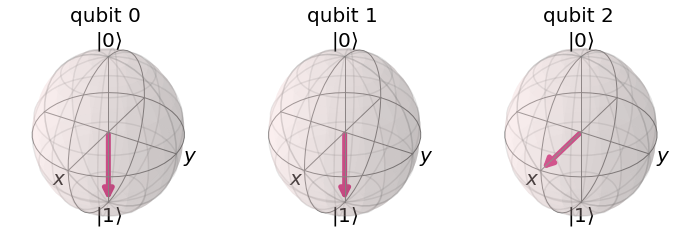

In [65]:
sv_sim = Aer.get_backend('statevector_simulator')
qobj = assemble(teleportation_circuit)
out_vector = sv_sim.run(qobj).result().get_statevector()
plot_bloch_multivector(out_vector)

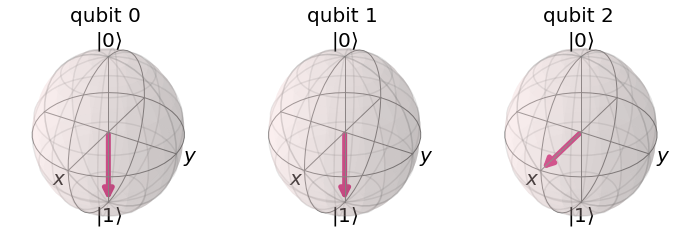

In [66]:
sv_sim = Aer.get_backend('statevector_simulator')
qobj = assemble(teleportation_circuit)
out_vector = sv_sim.run(qobj).result().get_statevector()
plot_bloch_multivector(out_vector)

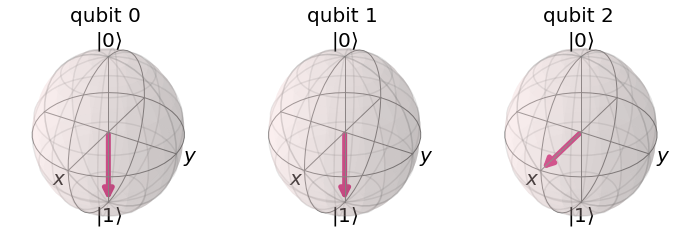

In [67]:
sv_sim = Aer.get_backend('statevector_simulator')
qobj = assemble(teleportation_circuit)
out_vector = sv_sim.run(qobj).result().get_statevector()
plot_bloch_multivector(out_vector)

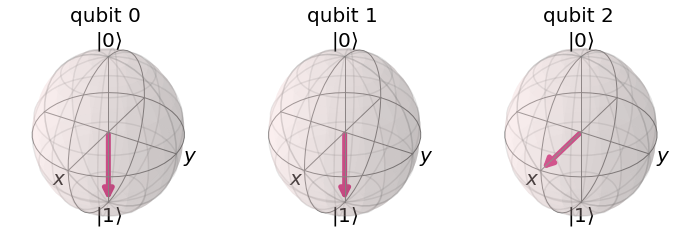

In [68]:
sv_sim = Aer.get_backend('statevector_simulator')
qobj = assemble(teleportation_circuit)
out_vector = sv_sim.run(qobj).result().get_statevector()
plot_bloch_multivector(out_vector)

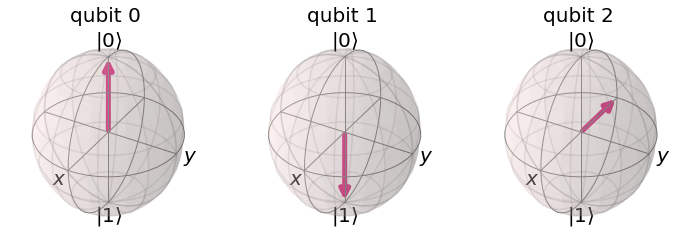

In [69]:
sv_sim = Aer.get_backend('statevector_simulator')
qobj = assemble(teleportation_circuit)
out_vector = sv_sim.run(qobj).result().get_statevector()
plot_bloch_multivector(out_vector)

In [42]:
from qiskit.quantum_info import *
def init_state(qc, a):
    
    #### your code goes here 
    rs = random_state(1)
    qc.initialize(rs,a)
    qc.draw()
    qc.barrier()

In [43]:
## SETUP 4
# Protocol uses 3 qubits and 2 classical bits in 2 different registers
qr = QuantumRegister(3, name="q")
crz, crx = ClassicalRegister(1, name="crz"), ClassicalRegister(1, name="crx")
teleportation_circuit = QuantumCircuit(qr, crz, crx)

## STEP 1
#### your code goes here 
init_state(teleportation_circuit,0)



## STEP 2
#### your code goes here 
create_bell_pair(teleportation_circuit,1,2)


## STEP 3 & 4
teleportation_circuit.barrier() # Use barrier to separate steps
#### your code goes here 
alice_gates(teleportation_circuit,0,1)
measure_and_send(teleportation_circuit,0,1)


## STEP 5
teleportation_circuit.barrier() # Use barrier to separate steps
#### your code goes here 
bob_gates(teleportation_circuit,2,crz,crx)


teleportation_circuit.draw()

┌───────────────────────────────────────────────┐ ░            ░      »
  q_0: ┤ Initialize(0.70482-0.62911j,0.28889-0.15486j) ├─░────────────░───■──»
       └───────────────────────────────────────────────┘ ░ ┌───┐      ░ ┌─┴─┐»
  q_1: ──────────────────────────────────────────────────░─┤ H ├──■───░─┤ X ├»
                                                         ░ └───┘┌─┴─┐ ░ └───┘»
  q_2: ──────────────────────────────────────────────────░──────┤ X ├─░──────»
                                                         ░      └───┘ ░      »
crz: 1/══════════════════════════════════════════════════════════════════════»
                                                                             »
crx: 1/══════════════════════════════════════════════════════════════════════»
                                                                             »
«             ░ ┌─┐    ░               
«  q_0: ──────░─┤M├────░───────────────
«       ┌───┐ ░ └╥┘┌─┐ ░               
«  q_1: ┤ H ├─░──╫─┤M├─░───────────────
«       └───┘ ░  ║ └╥┘ ░  ┌───┐  ┌───┐ 
«  q_2: ──────░──╫──╫──░──┤ X ├──┤ Z ├─
«             ░  ║  ║  ░  └─╥─┘  └─╥─┘ 
«                ║  ║       ║   ┌──╨──┐
«crz: 1/═════════╩══╬═══════╬═══╡ 0x1 ╞
«                0  ║    ┌──╨──┐└─────┘
«crx: 1/════════════╩════╡ 0x1 ╞═══════
«                   0    └─────┘

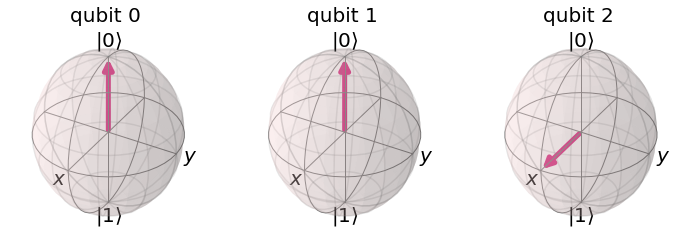

In [45]:
sv_sim = Aer.get_backend('statevector_simulator')
qobj = assemble(teleportation_circuit)
out_vector = sv_sim.run(qobj).result().get_statevector()
plot_bloch_multivector(out_vector)

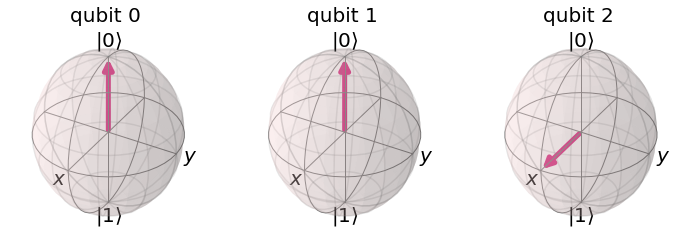

In [46]:
sv_sim = Aer.get_backend('statevector_simulator')
qobj = assemble(teleportation_circuit)
out_vector = sv_sim.run(qobj).result().get_statevector()
plot_bloch_multivector(out_vector)

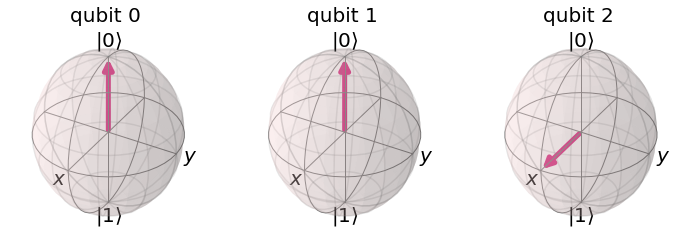

In [47]:
sv_sim = Aer.get_backend('statevector_simulator')
qobj = assemble(teleportation_circuit)
out_vector = sv_sim.run(qobj).result().get_statevector()
plot_bloch_multivector(out_vector)

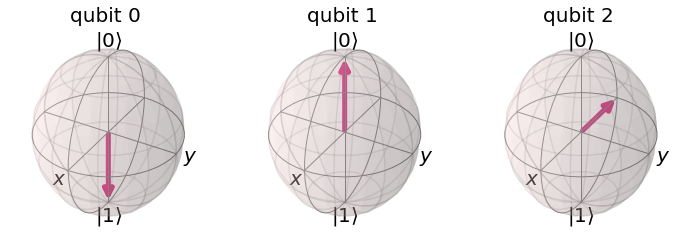

In [48]:
sv_sim = Aer.get_backend('statevector_simulator')
qobj = assemble(teleportation_circuit)
out_vector = sv_sim.run(qobj).result().get_statevector()
plot_bloch_multivector(out_vector)

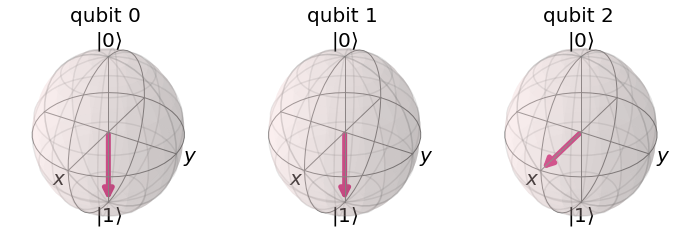

In [70]:
sv_sim = Aer.get_backend('statevector_simulator')
qobj = assemble(teleportation_circuit)
out_vector = sv_sim.run(qobj).result().get_statevector()
plot_bloch_multivector(out_vector)

# **3.- TELEPORTING QUANTUM STATES USING DIFFERENT BELL PAIRS**

In [72]:
def init_state(qc, a):
    #COGEREMOS EL ESTADO RANDOM QUE HEMOS VISTO EN EL CASO D)
    #### your code goes here 
    rs = random_state(1)
    qc.initialize(rs,a)
    qc.draw()
    qc.barrier()
    
    qc.x(0)
    qc.x(2)    
    
    qc.barrier()

In [71]:
def create_bell_pair(qc, a, b):
    """Creates a bell pair in qc using qubits a & b"""
    #### your code goes here
    qc.h(a)
    qc.cx(a,b)
    qc.draw()

In [73]:
def alice_gates(qc, psi, a):
    #### your code goes here
    qc.cx(psi,a)
    qc.h(a)

In [74]:
def measure_and_send(qc, a, b):
    """Measures qubits a & b and 'sends' the results to Bob"""
    qc.barrier()
    #### your code goes here
    qc.measure(a,0)
    qc.measure(b,1)

In [75]:
# This function takes a QuantumCircuit (qc), integer (qubit)
# and ClassicalRegisters (crz & crx) to decide which gates to apply
def bob_gates(qc, qubit, crz, crx):
    #### your code goes here
    qc.x(qubit).c_if(crx,1)
    qc.z(qubit).c_if(crz,1)

In [76]:
## SETUP APARTADO 3
# Protocol uses 3 qubits and 2 classical bits in 2 different registers
qr = QuantumRegister(3, name="q")
crz, crx = ClassicalRegister(1, name="crz"), ClassicalRegister(1, name="crx")
teleportation_circuit = QuantumCircuit(qr, crz, crx)

## STEP 1
#### your code goes here 
init_state(teleportation_circuit,0)



## STEP 2
#### your code goes here 
create_bell_pair(teleportation_circuit,1,2)


## STEP 3 & 4
teleportation_circuit.barrier() # Use barrier to separate steps
#### your code goes here 
alice_gates(teleportation_circuit,0,1)
measure_and_send(teleportation_circuit,0,1)


## STEP 5
teleportation_circuit.barrier() # Use barrier to separate steps
#### your code goes here 
bob_gates(teleportation_circuit,2,crz,crx)


teleportation_circuit.draw()

┌────────────────────────────────────────────────┐ ░ ┌───┐ ░           »
  q_0: ┤ Initialize(-0.2155+0.56689j,-0.74591+0.27534j) ├─░─┤ X ├─░───────────»
       └────────────────────────────────────────────────┘ ░ └───┘ ░ ┌───┐     »
  q_1: ───────────────────────────────────────────────────░───────░─┤ H ├──■──»
                                                          ░ ┌───┐ ░ └───┘┌─┴─┐»
  q_2: ───────────────────────────────────────────────────░─┤ X ├─░──────┤ X ├»
                                                          ░ └───┘ ░      └───┘»
crz: 1/═══════════════════════════════════════════════════════════════════════»
                                                                              »
crx: 1/═══════════════════════════════════════════════════════════════════════»
                                                                              »
«        ░            ░ ┌─┐    ░               
«  q_0: ─░───■────────░─┤M├────░───────────────
«        ░ ┌─┴─┐┌───┐ ░ └╥┘┌─┐ ░               
«  q_1: ─░─┤ X ├┤ H ├─░──╫─┤M├─░───────────────
«        ░ └───┘└───┘ ░  ║ └╥┘ ░  ┌───┐  ┌───┐ 
«  q_2: ─░────────────░──╫──╫──░──┤ X ├──┤ Z ├─
«        ░            ░  ║  ║  ░  └─╥─┘  └─╥─┘ 
«                        ║  ║       ║   ┌──╨──┐
«crz: 1/═════════════════╩══╬═══════╬═══╡ 0x1 ╞
«                        0  ║    ┌──╨──┐└─────┘
«crx: 1/════════════════════╩════╡ 0x1 ╞═══════
«                           0    └─────┘

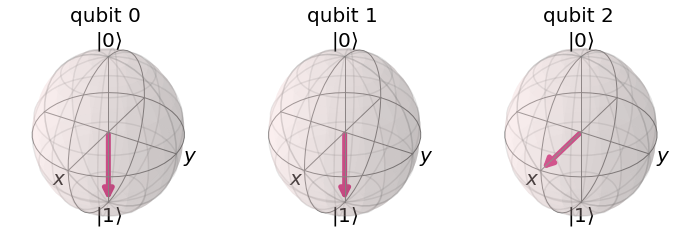

In [77]:
sv_sim = Aer.get_backend('statevector_simulator')
qobj = assemble(teleportation_circuit)
out_vector = sv_sim.run(qobj).result().get_statevector()
plot_bloch_multivector(out_vector)

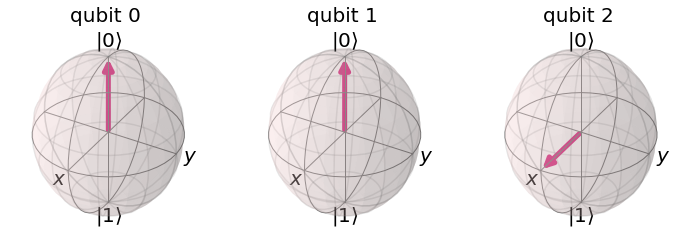

In [78]:
sv_sim = Aer.get_backend('statevector_simulator')
qobj = assemble(teleportation_circuit)
out_vector = sv_sim.run(qobj).result().get_statevector()
plot_bloch_multivector(out_vector)

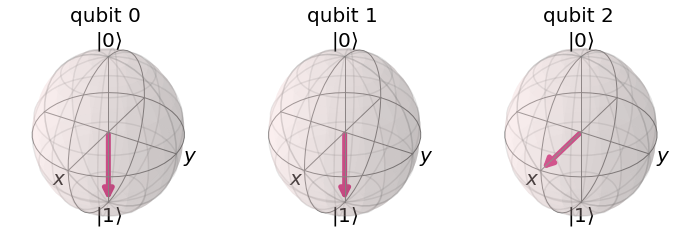

In [79]:
sv_sim = Aer.get_backend('statevector_simulator')
qobj = assemble(teleportation_circuit)
out_vector = sv_sim.run(qobj).result().get_statevector()
plot_bloch_multivector(out_vector)

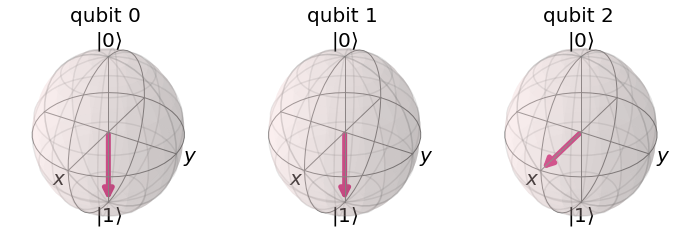

In [80]:
sv_sim = Aer.get_backend('statevector_simulator')
qobj = assemble(teleportation_circuit)
out_vector = sv_sim.run(qobj).result().get_statevector()
plot_bloch_multivector(out_vector)

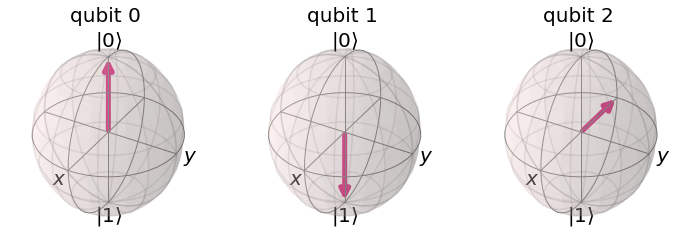

In [81]:
sv_sim = Aer.get_backend('statevector_simulator')
qobj = assemble(teleportation_circuit)
out_vector = sv_sim.run(qobj).result().get_statevector()
plot_bloch_multivector(out_vector)

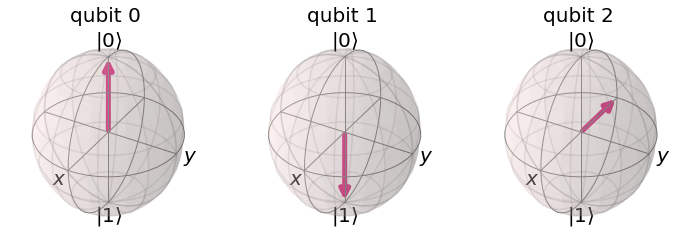

In [82]:
sv_sim = Aer.get_backend('statevector_simulator')
qobj = assemble(teleportation_circuit)
out_vector = sv_sim.run(qobj).result().get_statevector()
plot_bloch_multivector(out_vector)

**POR CUESTIONES DE TIEMPO Y DESCONOCIMIENTO NO HE PODIDO COMPLETAR LA SEGUNDA PARTE DEL APARTADO 3. NO ESTOY SEGURO DE SI HE REALIZADO CORRECTAMENTE EL RESTO DEL APARTADO. ME GUSTARÍA SABER CÓMO SE REALIZA DE CARA AL EXAMEN. NO PUDE ACUDIR A LA CLASE DE TEORÍA DONDE SE EXPLICÓ ESTO PORQUE ESTABA CONSTIPADO Y PODRÍA SER POSIBLE POSITIVO EN COVID. AL FINAL NO FUE NADA MÁS QUE UN SUSTO. TAMPOCO PUDE ACUDIR A LA SESIÓN DE PRÁCTICAS DE ESA SEMANA PORQUE EL DÍA DE ANTES OPERABAN A MI MADRE. ESPERO QUE LO ENTIENDA. ME GUSTARÍA QUE, SI ES POSIBLE, EN UN CORREO, UNA BREVE EXPLICACIÓN SOBRE CÓMO SE DEBERÍA ACABAR LA PRÁCTICA.**

**UN SALUDO Y QUE PASE BUEN FIN DE SEMANA,**

**MIGUEL ÁNGEL.**